In [24]:
import GPy
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.model_selection import train_test_split
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch_geometric.transforms import ToUndirected
from torch_geometric.utils import to_undirected
from torch_geometric_temporal.signal import temporal_signal_split
from tqdm import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'
seed = 42
torch.manual_seed(seed)
torch.random.manual_seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
%config InlineBackend.figure_format = 'retina'


In [29]:
G = nx.erdos_renyi_graph(5, 0.8)

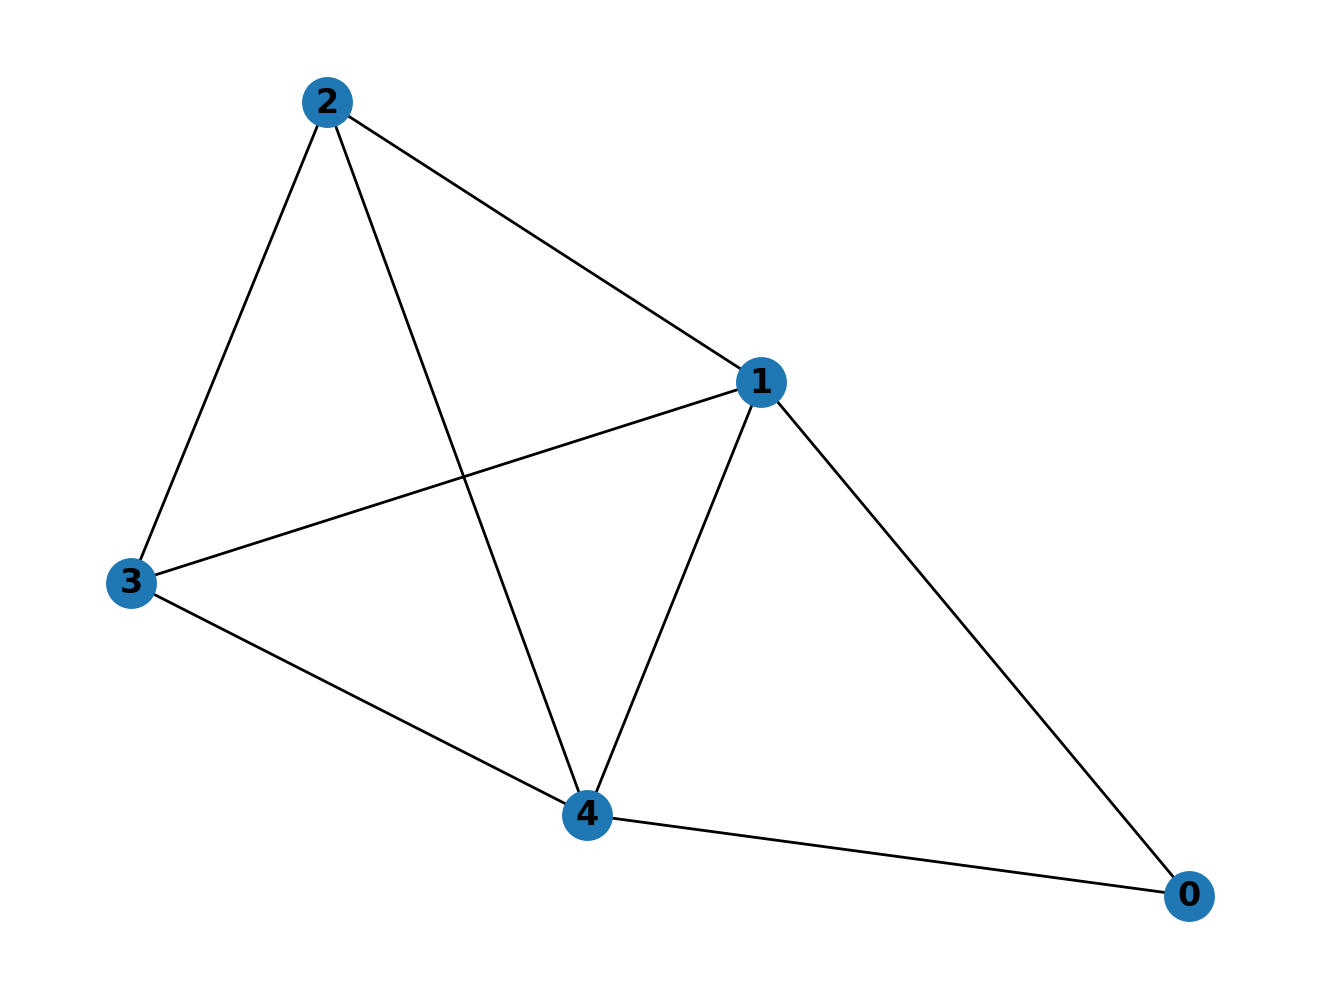

In [30]:
nx.draw(G, with_labels=True, font_weight='bold')

In [31]:
x1 = torch.randn(1, 10, 5)
timestamps = torch.arange(10).reshape(1, 10, 1)  
x1_with_timestamp = torch.cat((x1, timestamps), dim=2)  
print(x1_with_timestamp.shape)

torch.Size([1, 10, 6])


In [32]:
x2 = 0.8*x1
x2_with_timestamp = torch.cat((x2, timestamps), dim=2)
x3 = 0.8*x2
x3_with_timestamp = torch.cat((x3, timestamps), dim=2)
x4 = 0.8*x3
x4_with_timestamp = torch.cat((x4, timestamps), dim=2)
x5 = 0.8*x4
x5_with_timestamp = torch.cat((x5, timestamps), dim=2)

In [33]:
X = torch.cat((x1_with_timestamp, x2_with_timestamp, x3_with_timestamp, x4_with_timestamp, x5_with_timestamp), dim=0)

In [40]:
y1 = np.sin(np.arange(0, 10, 1))
y2 = 0.8*y1
y3 = 0.8*y2
y4 = 0.8*y3
y5 = 0.8*y4

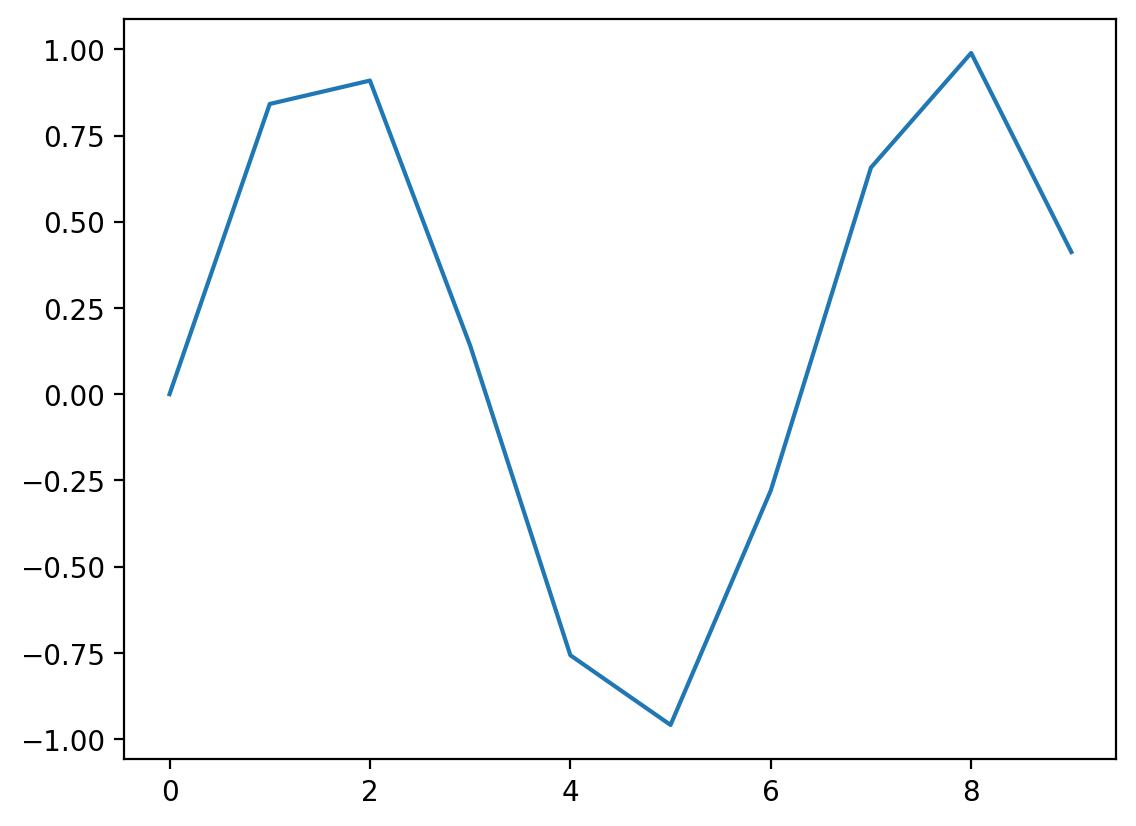

In [41]:
plt.plot(y);

In [43]:
y = torch.tensor([y1, y2, y3, y4, y5]).reshape(5, 10,1);